In [12]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)


In [15]:
from IRT.wrapper import load_data, DataOpts
data_opts=DataOpts(num_folds=5, item_id_col='problem_id', template_id_col=None, concept_id_col=None, remove_skill_nans=False, seed=0, use_correct=True, use_hints=False, drop_duplicates=True, max_interactions_per_user=None, min_interactions_per_user=2, proportion_students_retained=1.0, meta=True, prediction_output='data/Assistant/prediction/skill_builder_data.csv')
data, _, item_ids, _, _ = load_data("data/Assistant/skill_builder_data.csv", "assistments",data_opts)

In [24]:
len(data.index)
df=pd.DataFrame.from_csv("data/Assistant/skill_builder_data.csv")
df.index

/Users/xin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: DtypeWarning: Columns (17,29) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Int64Index([33022537, 33022709, 35450204, 35450295, 35450311, 35450555,
            35450573, 35480603, 33140811, 33140919,
            ...
            38213928, 38213929, 38214004, 38214010, 38214011, 38214014,
            38214016, 38214195, 38214196, 38214198],
           dtype='int64', name='order_id', length=525534)

In [33]:
df=df.loc[data.index].groupby(data.index.name).first()

In [35]:
df

,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,answer_type,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
order_id,,,,,,,,,,,,,,,,,,,,,
20224085,232368,73963,42904,76429,0,0,3,106016,tutor,choose_1,...,0,0,112313,31690,128739.0,NaN,0,NaN,1,NaN
20224095,232368,73963,42904,76430,0,1,1,194187,tutor,choose_1,...,0,0,194187,31690,128742.0,NaN,0,NaN,2,NaN
20224113,232368,73963,42904,76431,0,1,1,12734,tutor,algebra,...,0,2,12734,31690,NaN,35,0,NaN,3,NaN
20224123,232368,73963,42904,76432,0,1,1,333484,tutor,choose_1,...,0,1,333484,31690,128750.0,NaN,0,NaN,4,NaN
20224142,232368,73963,42904,76433,0,0,2,52828,tutor,algebra,...,2,2,65203,31690,NaN,2.5,0,1.0,5,NaN
20224159,232368,73963,42904,76434,0,0,3,54047,tutor,algebra,...,3,3,98250,31690,NaN,87.5,0,1.0,6,NaN
20224180,232368,73963,42893,76339,1,0,1,193531,tutor,algebra,...,0,0,193609,31690,NaN,78,0,NaN,7,1
20224183,232368,73963,42893,76340,0,0,2,4282,tutor,choose_1,...,0,3,13516,31690,128515.0,NaN,0,NaN,8,NaN
20224187,232368,73963,42893,76341,0,1,1,12578,tutor,choose_1,...,0,2,12578,31690,128520.0,NaN,0,NaN,9,NaN


In [43]:
df_select=pd.DataFrame()
df_select['ms_first_response']=df['ms_first_response']
df_select['attempt_count']=df['attempt_count']
df_select['opportunity']=df['opportunity']
df_select['overlap_time']=df['overlap_time']
df_select['correct']=df['correct']
df_select

,ms_first_response,attempt_count,opportunity,overlap_time,correct
order_id,,,,,
20224085,106016,3,1,112313,0
20224095,194187,1,2,194187,1
20224113,12734,1,3,12734,1
20224123,333484,1,4,333484,1
20224142,52828,2,5,65203,0
20224159,54047,3,6,98250,0
20224180,193531,1,7,193609,0
20224183,4282,2,8,13516,0
20224187,12578,1,9,12578,1


/Users/xin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/xin/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/xin/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/xin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/xin/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/xin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IO

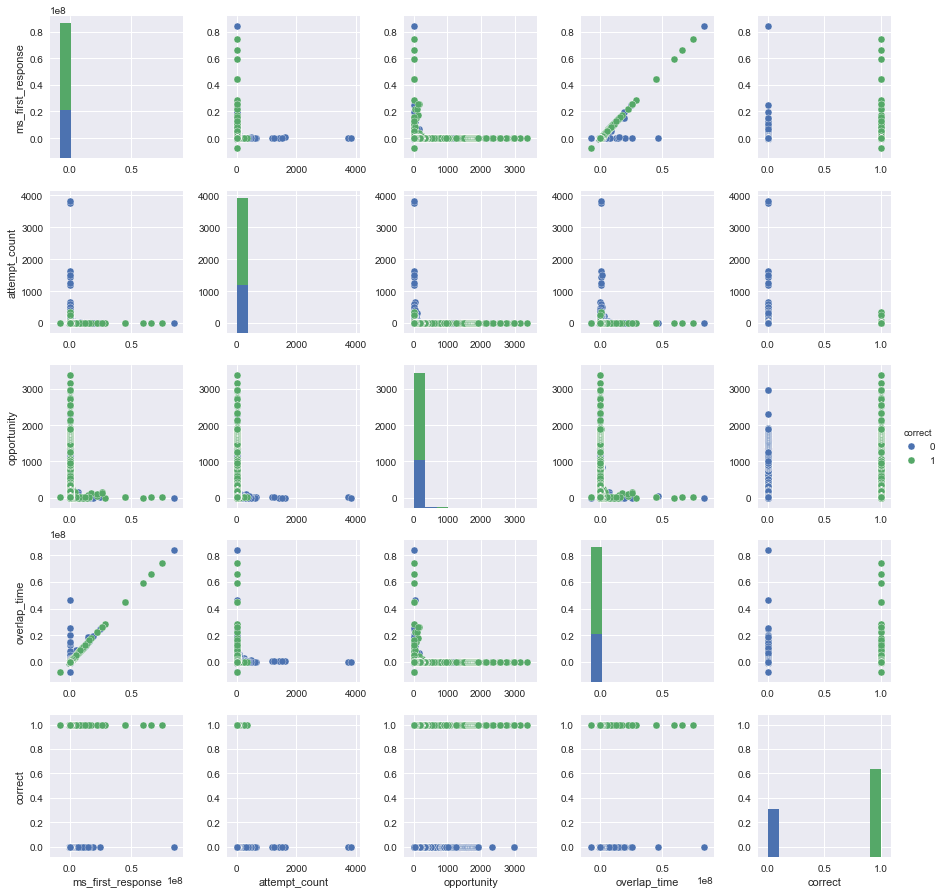

In [44]:

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set()
sns_plot=sns.pairplot(df_select,hue="correct");
sns_plot.savefig("output.png")